In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Support Vector Machine: Accuracy = 0.7793
Cross-Validation Scores (Accuracy per Fold): [0.80661578 0.80916031 0.74489796 0.7244898  0.72193878]
Mean Accuracy: 0.7614205224074364


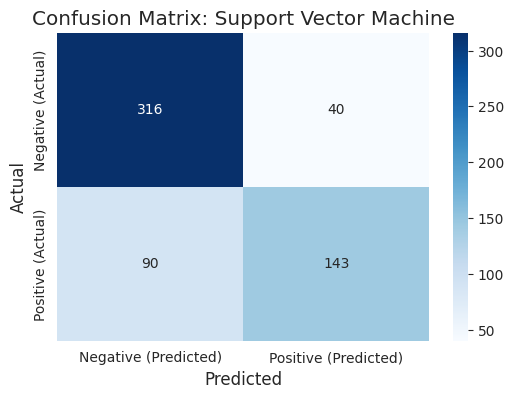

In [72]:
data = pd.read_csv('myBca.csv')
data['sentimen'] = data['sentimen'].map({'positif': 1, 'negatif': 0})
X = data['clean_text']
y = data['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

svm = SVC(kernel='linear', random_state=44)
svm.fit(X_train_vect, y_train)

y_pred = svm.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f'Support Vector Machine: Accuracy = {accuracy:.4f}')
pipeline = make_pipeline(
    TfidfVectorizer(use_idf=True, strip_accents='ascii'),
    SVC(kernel='linear', random_state=44)
)

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores (Accuracy per Fold):', cv_scores)
print('Mean Accuracy:', cv_scores.mean())
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
            yticklabels=['Negative (Actual)', 'Positive (Actual)'])
plt.title('Confusion Matrix: Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
